# Multilayer Perceptrons
You should build an end-to-end machine learning pipeline using a multilayer perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [multilayer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import uniform
import warnings
warnings.filterwarnings("ignore")

In [36]:
url = "https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv"
data = pd.read_csv(url)
data.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X = data.drop(columns=["class"])
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
if 'id' in X_train.columns:
    X_train.drop(columns=["id"], inplace=True)
    X_test.drop(columns=["id"], inplace=True)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
mlp = MLPClassifier(random_state=42, max_iter=100)

In [41]:
param_dist = {
    'hidden_layer_sizes': [(64,), (128,), (128, 64), (64, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'adaptive']
}

In [42]:
search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search.fit(X_train_scaled, y_train)
print("✅ Best Parameters:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best Parameters: {'activation': 'relu', 'alpha': np.float64(0.005308342600258237), 'hidden_layer_sizes': (128,), 'learning_rate': 'adaptive', 'solver': 'adam'}



✅ Accuracy: 0.9213

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.96      0.97      0.96        97
           2       0.90      0.92      0.91        78
           3       0.87      0.89      0.88        84
           4       0.90      0.95      0.92        74
           5       0.89      0.90      0.90        73
           6       0.91      0.94      0.92        78
           7       0.94      0.92      0.93        85
           8       0.96      0.83      0.89        83
           9       0.93      0.93      0.93        73

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



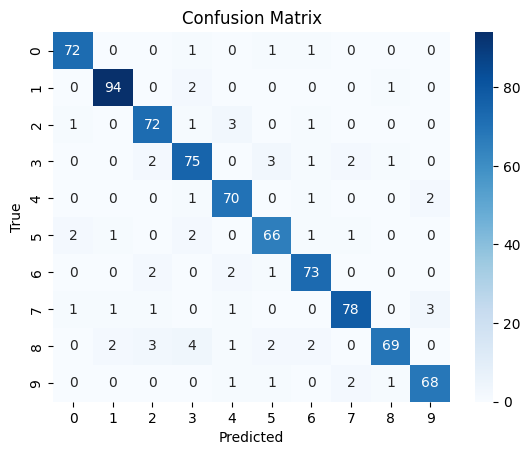

In [43]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.4f}")

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [44]:
cv_score = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_score.mean():.4f}")

Cross-validation Accuracy: 0.9238
